## Analysis of duration data

### Import and load data

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [5]:
iterations = 125
n_trucks = 250
scenarios = range(9)

results = pickle.load(open("../data/results.pickle", "rb"))
print(type(results))

<class 'dict'>


### Analysis

In [6]:
averages = {}
for s in scenarios:
    averages[s] = []
    for i in range(iterations):
        averages[s].append(statistics.mean(results[s][i]))

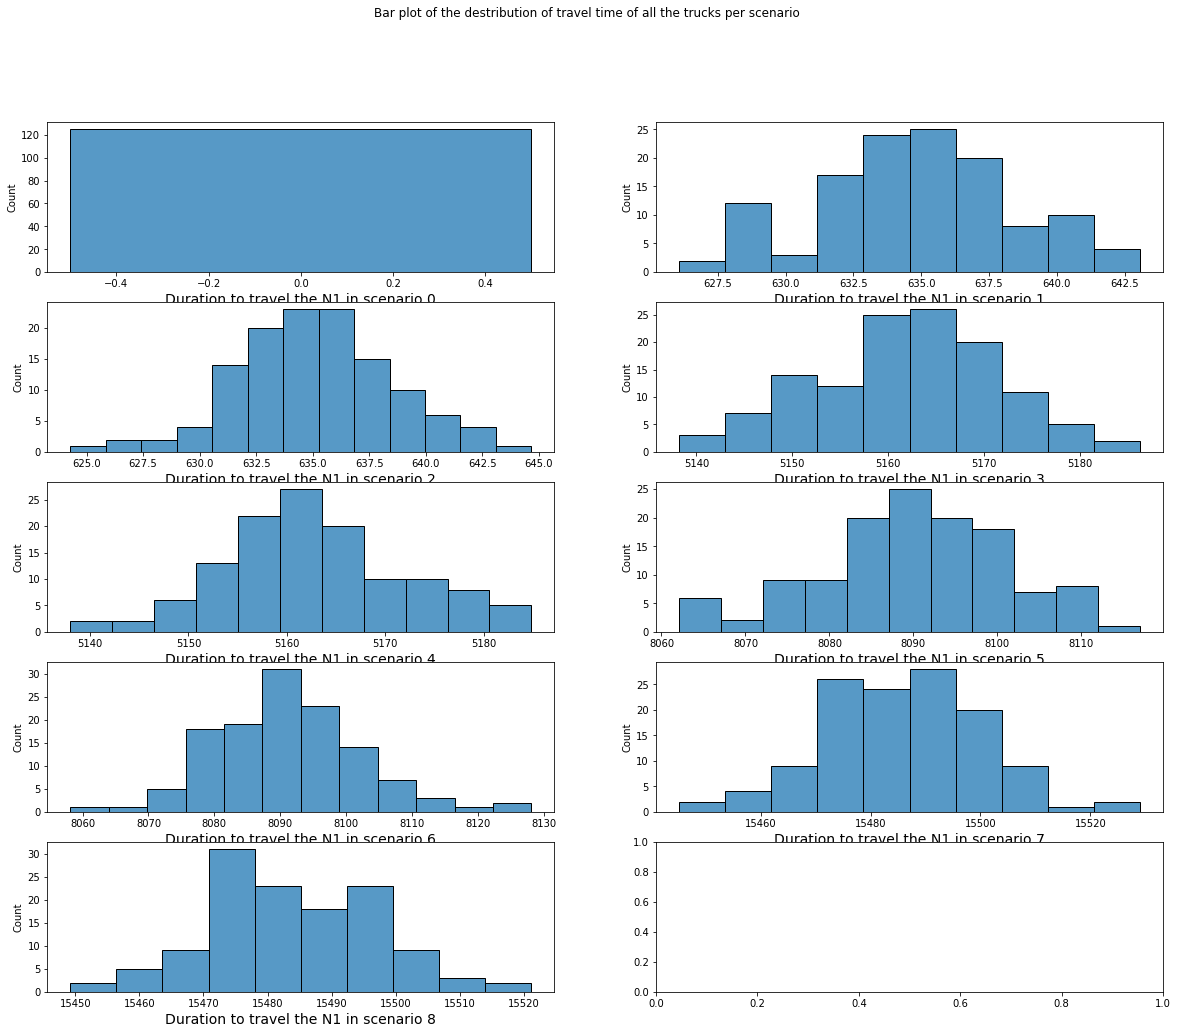

In [7]:
# visualisation of the deviation of the time taken (in minutes) for each scenario
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 16))
fig.suptitle('Bar plot of the destribution of travel time of all the trucks per scenario')

sns.histplot(ax=axs[0,0], data=averages[0])
axs[0,0].set_xlabel('Duration to travel the N1 in scenario 0', fontsize=14)

sns.histplot(ax=axs[0,1], data=averages[1])
axs[0,1].set_xlabel('Duration to travel the N1 in scenario 1', fontsize=14)

sns.histplot(ax=axs[1,0], data=averages[2])
axs[1,0].set_xlabel('Duration to travel the N1 in scenario 2', fontsize=14)

sns.histplot(ax=axs[1,1], data=averages[3])
axs[1,1].set_xlabel('Duration to travel the N1 in scenario 3', fontsize=14)

sns.histplot(ax=axs[2,0], data=averages[4])
axs[2,0].set_xlabel('Duration to travel the N1 in scenario 4', fontsize=14)

sns.histplot(ax=axs[2,1], data=averages[5])
axs[2,1].set_xlabel('Duration to travel the N1 in scenario 5', fontsize=14)

sns.histplot(ax=axs[3,0], data=averages[6])
axs[3,0].set_xlabel('Duration to travel the N1 in scenario 6', fontsize=14)

sns.histplot(ax=axs[3,1], data=averages[7])
axs[3,1].set_xlabel('Duration to travel the N1 in scenario 7', fontsize=14)

sns.histplot(ax=axs[4,0], data=averages[8])
axs[4,0].set_xlabel('Duration to travel the N1 in scenario 8', fontsize=14)
plt.show()

In [81]:
#calculating the amount of trucs finishing the run in each scenario
for i in range (9):
    x = len(durations[i])
    print(f'There are {x} trucks on the N1 in scenario {i}')
#len(durations[0])

There are 1326 trucks on the N1 in scenario 0
There are 1295 trucks on the N1 in scenario 1
There are 1313 trucks on the N1 in scenario 2
There are 1280 trucks on the N1 in scenario 3
There are 1193 trucks on the N1 in scenario 4
There are 1229 trucks on the N1 in scenario 5
There are 1030 trucks on the N1 in scenario 6
There are 954 trucks on the N1 in scenario 7
There are 640 trucks on the N1 in scenario 8


In [86]:
#calculating the average travel time
for i in range(9):
    x = mean(durations[i])
    print(f'The average time a truck in scenario {i} to travel the N1 is {x:.2f} minutes')


The average time a truck in scenario 0 to travel the N1 is 571.00 minutes
The average time a truck in scenario 1 to travel the N1 is 727.59 minutes
The average time a truck in scenario 2 to travel the N1 is 638.18 minutes
The average time a truck in scenario 3 to travel the N1 is 802.34 minutes
The average time a truck in scenario 4 to travel the N1 is 1240.09 minutes
The average time a truck in scenario 5 to travel the N1 is 1057.26 minutes
The average time a truck in scenario 6 to travel the N1 is 2043.31 minutes
The average time a truck in scenario 7 to travel the N1 is 2416.53 minutes
The average time a truck in scenario 8 to travel the N1 is 3999.64 minutes


In [92]:
#calculating the avegrage economic los
s0 = mean(durations[0])
for i in range(1, 9):
    x = (mean(durations[i]) - s0) * 2.5 /60 /24
    print(f'The average economic loss in scenario {i} is {x:.2f} % of the value of the cargo of the truck')

The average economic loss in scenario 1 is 0.27 of the value of the cargo of the truck
The average economic loss in scenario 2 is 0.12 of the value of the cargo of the truck
The average economic loss in scenario 3 is 0.40 of the value of the cargo of the truck
The average economic loss in scenario 4 is 1.16 of the value of the cargo of the truck
The average economic loss in scenario 5 is 0.84 of the value of the cargo of the truck
The average economic loss in scenario 6 is 2.56 of the value of the cargo of the truck
The average economic loss in scenario 7 is 3.20 of the value of the cargo of the truck
The average economic loss in scenario 8 is 5.95 of the value of the cargo of the truck


In [113]:
#calculating average delay
for i in range(1, 9):
    x = (mean(durations[i]) - s0)
    print(round(x, 2))


156.59
67.18
231.34
669.09
486.26
1472.31
1845.53
3428.64


In [114]:
#calculating 95% confidence intervals of the economic losses

import scipy.stats as st
confidence = 0.95
std0 = np.std(durations[0])
for i in range(1,9):

    low_bound, high_bound = st.norm.interval(alpha=confidence, loc=np.mean((durations[i]-s0)), scale=st.sem(durations[i]))
    interval_range = high_bound - low_bound

    economic_interval = interval_range / np.mean((durations[i]-s0)) * 100

    #print(f'For scenario {i} the 95% confidence interval is {low_bound:.2f} to {high_bound:.2f}')
    print(economic_interval)


2.542766604493386
2.0932866694352703
1.377612711815277
1.0989637966065542
0.8132638702438824
0.5540229269380111
0.5627834387728725
0.4740351652426685
